# 特征归一化
- 真实环境很有可能无法得到所有的测试数据的统计学度量（如均值、方差等），所以对测试集的归一化应使用训练集的统计度量
- 对数据的归一化也是算法的一部分

# 最值归一化：Min-Max Scaling

- 作用：把所有数据映射到0-1之间
- 适用条件：数据分布有明显边界情况，如考试成绩、像素点
- 缺点：受outlier影响较大，如边界数据
- 特征量化公式：
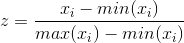

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

iris = datasets.load_iris()
X = iris.data
y = iris.target
X_trian, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=666)

minMaxScaler = MinMaxScaler() #标准度量对象
minMaxScaler.fit(X_trian)     #对训练集计算最值度量（最小值、最大值等多种统计学度量）

MinMaxScaler(copy=True, feature_range=(0, 1))

In [2]:
minMaxScaler.min_   #返回最小值

array([-1.19444444, -0.83333333, -0.19642857, -0.04166667])

In [3]:
minMaxScaler.scale_ #返回数据特征的相对度量，这些度量保存在模型中

array([ 0.27777778,  0.41666667,  0.17857143,  0.41666667])

In [4]:
X_trian = minMaxScaler.transform(X_trian) #对训练集进行最值归一化，并保存给原变量
X_trian

array([[ 0.22222222,  0.625     ,  0.05357143,  0.04166667],
       [ 0.16666667,  0.41666667,  0.05357143,  0.04166667],
       [ 0.38888889,  0.33333333,  0.53571429,  0.5       ],
       [ 0.52777778,  0.58333333,  0.76785714,  0.91666667],
       [ 0.22222222,  0.20833333,  0.33928571,  0.41666667],
       [ 0.75      ,  0.5       ,  0.64285714,  0.54166667],
       [ 0.5       ,  0.25      ,  0.80357143,  0.54166667],
       [ 0.91666667,  0.41666667,  0.98214286,  0.83333333],
       [ 0.25      ,  0.875     ,  0.07142857,  0.        ],
       [ 0.52777778,  0.08333333,  0.60714286,  0.58333333],
       [ 0.83333333,  0.375     ,  0.92857143,  0.70833333],
       [ 0.58333333,  0.5       ,  0.75      ,  0.91666667],
       [ 0.47222222,  0.58333333,  0.60714286,  0.625     ],
       [ 0.25      ,  0.29166667,  0.5       ,  0.54166667],
       [ 0.30555556,  0.70833333,  0.07142857,  0.04166667],
       [ 0.27777778,  0.70833333,  0.07142857,  0.04166667],
       [ 0.19444444,  0.

In [5]:
X_test_minMax = minMaxScaler.transform(X_test) #对测试集进行最值归一化，并保存给原变量
X_test_minMax

array([[ 0.36111111,  0.41666667,  0.60714286,  0.58333333],
       [ 0.41666667,  0.33333333,  0.71428571,  0.95833333],
       [ 0.19444444,  0.125     ,  0.39285714,  0.375     ],
       [ 0.41666667,  0.29166667,  0.71428571,  0.75      ],
       [ 0.08333333,  0.45833333,  0.07142857,  0.04166667],
       [ 0.33333333,  0.20833333,  0.51785714,  0.5       ],
       [ 0.38888889,  0.33333333,  0.60714286,  0.5       ],
       [ 0.61111111,  0.41666667,  0.73214286,  0.79166667],
       [ 0.55555556,  0.125     ,  0.58928571,  0.5       ],
       [ 0.33333333,  0.25      ,  0.58928571,  0.45833333],
       [ 0.66666667,  0.45833333,  0.58928571,  0.54166667],
       [ 0.05555556,  0.125     ,  0.03571429,  0.08333333],
       [ 0.13888889,  0.45833333,  0.08928571,  0.04166667],
       [ 0.30555556,  0.58333333,  0.07142857,  0.125     ],
       [ 0.80555556,  0.66666667,  0.89285714,  1.        ],
       [ 0.41666667,  0.29166667,  0.53571429,  0.375     ],
       [ 0.08333333,  0.

In [9]:
kNN_clf = KNeighborsClassifier(n_neighbors=5)
kNN_clf.fit(X_trian, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [10]:
kNN_clf.score(X_test_minMax, y_test)

1.0

In [11]:
kNN_clf.score(X_test, y_test)

0.33333333333333331

# 均值方差归一化： Standardization
- 作用：把所有数据归一到均值为0、方差为1的分布中
- 适用条件：数据分布没有明显边界，可能存在极端数据值的情况（较为普适）
- 特征量化公式：
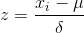
- 注意事项：
    - 对测试集的归一化应该使用训练集的统计学度量，这样才最真实

### sklearn中的Scaler

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data
y = iris.target
X_trian, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=666)

standardScaler = StandardScaler() #标准度量对象
standardScaler.fit(X_trian)       #对训练集计算标准度量（均值，标准差等多种统计学度量）

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
standardScaler.mean_  #返回均值

In [ ]:
standardScaler.scale_ #返回数据特征的相对度量，这些度量保存在模型中

In [ ]:
# standardScaler.transform(X_trian) #对训练集进行归一化，但不改变原变量

In [2]:
X_trian = standardScaler.transform(X_trian) #对训练集进行标准归一化，并保存给原变量
X_trian

array([[-0.90616043,  0.94720873, -1.30982967, -1.28485856],
       [-1.15301457, -0.18717298, -1.30982967, -1.28485856],
       [-0.16559799, -0.64092567,  0.22169257,  0.17345038],
       [ 0.45153738,  0.72033239,  0.95909217,  1.49918578],
       [-0.90616043, -1.3215547 , -0.40226093, -0.0916967 ],
       [ 1.43895396,  0.2665797 ,  0.56203085,  0.30602392],
       [ 0.3281103 , -1.09467835,  1.07253826,  0.30602392],
       [ 2.1795164 , -0.18717298,  1.63976872,  1.2340387 ],
       [-0.78273335,  2.30846679, -1.25310662, -1.4174321 ],
       [ 0.45153738, -2.00218372,  0.44858475,  0.43859746],
       [ 1.80923518, -0.41404933,  1.46959958,  0.83631808],
       [ 0.69839152,  0.2665797 ,  0.90236912,  1.49918578],
       [ 0.20468323,  0.72033239,  0.44858475,  0.571171  ],
       [-0.78273335, -0.86780201,  0.10824648,  0.30602392],
       [-0.53587921,  1.40096142, -1.25310662, -1.28485856],
       [-0.65930628,  1.40096142, -1.25310662, -1.28485856],
       [-1.0295875 ,  0.

##### 这里对测试集的归一化使用的是已经计算好的保存在Scaler中的统计度量！！！

In [3]:
X_test_std = standardScaler.transform(X_test) #对测试集进行标准归一化，并保存给原变量
X_test_std

array([[-0.28902506, -0.18717298,  0.44858475,  0.43859746],
       [-0.04217092, -0.64092567,  0.78892303,  1.63175932],
       [-1.0295875 , -1.77530738, -0.2320918 , -0.22427024],
       [-0.04217092, -0.86780201,  0.78892303,  0.96889162],
       [-1.52329579,  0.03970336, -1.25310662, -1.28485856],
       [-0.41245214, -1.3215547 ,  0.16496953,  0.17345038],
       [-0.16559799, -0.64092567,  0.44858475,  0.17345038],
       [ 0.82181859, -0.18717298,  0.84564608,  1.10146516],
       [ 0.57496445, -1.77530738,  0.39186171,  0.17345038],
       [-0.41245214, -1.09467835,  0.39186171,  0.04087684],
       [ 1.06867274,  0.03970336,  0.39186171,  0.30602392],
       [-1.64672287, -1.77530738, -1.36655271, -1.15228502],
       [-1.27644165,  0.03970336, -1.19638358, -1.28485856],
       [-0.53587921,  0.72033239, -1.25310662, -1.01971148],
       [ 1.68580811,  1.17408507,  1.35615349,  1.76433286],
       [-0.04217092, -0.86780201,  0.22169257, -0.22427024],
       [-1.52329579,  1.

In [4]:
kNN_clf = KNeighborsClassifier(n_neighbors=3)
kNN_clf.fit(X_trian, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [5]:
kNN_clf.score(X_test_std, y_test) #测试集归一化后的结果

1.0

In [6]:
kNN_clf.score(X_test, y_test)     #测试集不归一化

0.33333333333333331